In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ast
import json
import itertools
from collections import Counter, defaultdict

# import the regressor 
from sklearn.model_selection import train_test_split

from sklearn import metrics

#Classification libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data
international_match_data = pd.read_csv('./data/international_raw_match_full.csv')

professional_match_data = pd.read_csv('./data/professional_raw_match_full.csv')

premier_match_data = pd.read_csv('./data/premier_raw_match_full.csv')

pd.set_option('display.max_columns', 500)


In [3]:
#displaying internation match dataset
display(international_match_data.head())

display(international_match_data.info())

,Unnamed: 0,Unnamed: 0.1,barracks_status_dire,barracks_status_radiant,cluster,cosmetics,dire_score,dire_team,draft_timings,duration,engine,first_blood_time,game_mode,human_players,league,leagueid,lobby_type,loss,match_id,match_seq_num,objectives,patch,picks_bans,radiant_gold_adv,radiant_score,radiant_team,radiant_win,radiant_xp_adv,region,series_id,series_type,skill,start_time,throw,tower_status_dire,tower_status_radiant,version
0,0,0.0,51,63,308,"{'647': 132, '4269': 129, '4538': 129, '4560':...",11,"{'team_id': 2163, 'name': 'Team Liquid', 'tag'...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",1474,1,121,2,10,"{'leagueid': 10749, 'ticket': None, 'banner': ...",10749,1,7103.0,4986461644,4182489532,"[{'time': 121, 'type': 'CHAT_MESSAGE_FIRSTBLOO...",41,"[{'is_pick': False, 'hero_id': 52, 'team': 0, ...","[0, 185, 193, 451, 40, 42, -130, -604, -1114, ...",20,"{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...",True,"[0, -131, 5, -86, -27, 129, 963, 256, -290, -4...",NaN,360940,2,NaN,1566733817,1577.0,1926,1972,21.0
1,1,1.0,63,15,308,"{'647': 132, '4092': 1, '4358': 2, '4838': 3, ...",36,"{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",1403,1,282,2,10,"{'leagueid': 10749, 'ticket': None, 'banner': ...",10749,1,NaN,4986362254,4182407450,"[{'time': 283, 'type': 'CHAT_MESSAGE_FIRSTBLOO...",41,"[{'is_pick': False, 'hero_id': 97, 'team': 0, ...","[0, -180, -420, -525, -556, -1028, -968, -1428...",11,"{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",False,"[0, 106, -95, -190, -196, -318, -1219, -1921, ...",NaN,360940,2,NaN,1566730459,NaN,2046,1568,21.0
2,2,2.0,63,3,308,"{'647': 4, '4092': 1, '4515': 131, '5239': 1, ...",40,"{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",1945,1,46,2,10,"{'leagueid': 10749, 'ticket': None, 'banner': ...",10749,1,NaN,4986260666,4182333960,"[{'time': 47, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...",41,"[{'is_pick': False, 'hero_id': 97, 'team': 0, ...","[0, -404, -722, -530, -948, -644, -1043, -1184...",11,"{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",False,"[0, 89, -85, 399, 262, 329, -4, 327, 132, 289,...",NaN,360940,2,NaN,1566726706,NaN,2038,1540,21.0
3,3,3.0,51,2,308,"{'647': 129, '4092': 1, '4838': 3, '5239': 1, ...",24,"{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",2914,1,124,2,10,"{'leagueid': 10749, 'ticket': None, 'banner': ...",10749,1,21495.0,4986133311,4182252910,"[{'time': 124, 'type': 'CHAT_MESSAGE_FIRSTBLOO...",41,"[{'is_pick': False, 'hero_id': 52, 'team': 1, ...","[0, 377, 51, 260, 277, 620, 719, 1301, 1717, 1...",33,"{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",True,"[0, 148, -396, -534, -840, -651, -800, -219, -...",NaN,360940,2,NaN,1566721992,0.0,260,1536,21.0
4,4,4.0,63,0,308,"{'647': 0, '4092': 129, '4184': 0, '5239': 129...",30,"{'team_id': 2163, 'name': 'Team Liquid', 'tag'...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",2194,1,82,2,10,"{'leagueid': 10749, 'ticket': None, 'banner': ...",10749,1,NaN,4985891168,4182034450,"[{'time': 82, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...",41,"[{'is_pick': False, 'hero_id': 52, 'team': 1, ...","[0, -347, -680, -651, -601, -664, -1206, -1157...",8,"{'team_id': 15, 'name': 'PSG.LGD', 'tag': 'PSG...",False,"[0, -71, -6, -92, -277, -650, -712, -721, -826...",NaN,360881,1,NaN,1566713543,NaN,2046,0,21.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2941 entries, 0 to 2940
Data columns (total 37 columns):
Unnamed: 0                 2941 non-null int64
Unnamed: 0.1               2940 non-null float64
barracks_status_dire       2941 non-null int64
barracks_status_radiant    2941 non-null int64
cluster                    2941 non-null int64
cosmetics                  2922 non-null object
dire_score                 2941 non-null int64
dire_team                  2913 non-null object
draft_timings              2291 non-null object
duration                   2941 non-null int64
engine                     2941 non-null int64
first_blood_time           2941 non-null int64
game_mode                  2941 non-null int64
human_players              2941 non-null int64
league                     2941 non-null object
leagueid                   2941 non-null int64
lobby_type                 2941 non-null int64
loss                       927 non-null float64
match_id                   2941 non-null

None

In [4]:
#displaying internation match dataset
display(professional_match_data.head())

display(professional_match_data.info())

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,barracks_status_dire,barracks_status_radiant,cluster,cosmetics,dire_score,dire_team,draft_timings,duration,engine,first_blood_time,game_mode,human_players,league,leagueid,lobby_type,loss,match_id,match_seq_num,objectives,patch,picks_bans,radiant_gold_adv,radiant_score,radiant_team,radiant_win,radiant_xp_adv,region,series_id,series_type,skill,start_time,throw,tower_status_dire,tower_status_radiant,version
0,0,0.0,0.0,0.0,0.0,3.0,63.0,236.0,"{'10898': 2, '12947': 4}",38.0,"{'team_id': 7359442, 'name': 'Team Aspirations...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",2665.0,1.0,11.0,2.0,10.0,"{'leagueid': 11382, 'ticket': None, 'banner': ...",11382.0,1.0,12745.0,5.108886e+09,4.286706e+09,"[{'time': 12, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...",41.0,"[{'is_pick': False, 'hero_id': 9, 'team': 1, '...","[0, -185, -28, 17, 64, -426, -247, -1124, -104...",57.0,"{'team_id': 7314697, 'name': 'FIVE BROTHERS', ...",1.0,"[0, 438, 70, -266, 154, -576, -1088, -1768, -1...",NaN,385455.0,1.0,NaN,1.573480e+09,1914.0,4.0,1974.0,21.0
1,1,1.0,1.0,1.0,1.0,51.0,51.0,236.0,"{'4942': 129, '5043': 2, '5044': 2, '5045': 2,...",61.0,"{'team_id': 7467648, 'name': 'Punch gaming', '...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",2855.0,1.0,0.0,2.0,10.0,"{'leagueid': 11382, 'ticket': None, 'banner': ...",11382.0,1.0,NaN,5.108800e+09,4.286625e+09,"[{'time': -1, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...",41.0,"[{'is_pick': False, 'hero_id': 58, 'team': 0, ...","[-328, -430, 637, 931, 906, 1602, 1589, 1229, ...",41.0,"{'team_id': 7408440, 'name': 'Look For Smile',...",0.0,"[-39, -7, 146, 304, 32, 1096, 1381, 4, 842, 64...",NaN,385449.0,1.0,NaN,1.573476e+09,NaN,1792.0,262.0,21.0
2,2,2.0,2.0,2.0,2.0,15.0,63.0,236.0,"{'602': 128, '4054': 128, '4254': 128, '4461':...",31.0,"{'team_id': 7408440, 'name': 'Look For Smile',...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",2326.0,1.0,46.0,2.0,10.0,"{'leagueid': 11382, 'ticket': None, 'banner': ...",11382.0,1.0,2834.0,5.108735e+09,4.286561e+09,"[{'time': 47, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...",41.0,"[{'is_pick': False, 'hero_id': 79, 'team': 1, ...","[0, 609, 698, 1028, 899, 770, 627, 1051, 584, ...",42.0,"{'team_id': 7467648, 'name': 'Punch gaming', '...",1.0,"[0, 69, -104, 142, 345, 506, 464, 188, 291, -5...",NaN,385443.0,1.0,NaN,1.573473e+09,4907.0,4.0,1828.0,21.0
3,3,3.0,3.0,3.0,3.0,48.0,63.0,236.0,"{'647': 129, '4524': 4, '4527': 4, '4794': 131...",44.0,"{'team_id': 6634461, 'name': 'Team Sincere', '...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",2619.0,1.0,16.0,2.0,10.0,"{'leagueid': 11263, 'ticket': None, 'banner': ...",11263.0,1.0,NaN,5.108711e+09,4.286544e+09,"[{'time': 16, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...",41.0,"[{'is_pick': False, 'hero_id': 52, 'team': 1, ...","[0, 12, -10, 359, 532, 1323, 2715, 2672, 2675,...",39.0,"{'team_id': 7253435, 'name': 'Team Galaxy', 't...",0.0,"[0, -85, 77, 383, 474, 1383, 1874, 1678, 1572,...",NaN,385430.0,1.0,NaN,1.573472e+09,NaN,1792.0,1414.0,21.0
4,4,4.0,4.0,4.0,4.0,63.0,0.0,236.0,"{'5266': 1, '5268': 1, '6037': 3, '6039': 3, '...",41.0,"{'team_id': 7451388, 'name': 'LieYing Team', '...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",1431.0,1.0,34.0,2.0,10.0,"{'leagueid': 11407, 'ticket': None, 'banner': ...",11407.0,1.0,NaN,5.108703e+09,4.286520e+09,"[{'time': 35, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...",41.0,"[{'is_pick': False, 'hero_id': 60, 'team': 0, ...","[0, 13, -418, -335, -1309, -949, -1532, -3039,...",16.0,"{'team_id': 7443956, 'name': 'Black Knight', '...",0.0,"[0, -21, -84, -156, -916, -540, -142, -1673, -...",NaN,385436.0,1.0,NaN,1.573471e+09,NaN,1982.0,1536.0,21.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74339 entries, 0 to 74338
Data columns (total 40 columns):
Unnamed: 0                 74339 non-null int64
Unnamed: 0.1               74339 non-null float64
Unnamed: 0.1.1             74131 non-null float64
Unnamed: 0.1.1.1           50643 non-null float64
Unnamed: 0.1.1.1.1         50643 non-null float64
barracks_status_dire       74339 non-null float64
barracks_status_radiant    74339 non-null float64
cluster                    74339 non-null float64
cosmetics                  71252 non-null object
dire_score                 74339 non-null float64
dire_team                  69414 non-null object
draft_timings              55657 non-null object
duration                   74339 non-null float64
engine                     74339 non-null float64
first_blood_time           74339 non-null float64
game_mode                  74339 non-null float64
human_players              74339 non-null float64
league                     74339 non-null obje

None

In [5]:
#displaying internation match dataset
display(premier_match_data.head())

display(premier_match_data.info())

,Unnamed: 0,Unnamed: 0.1,barracks_status_dire,barracks_status_radiant,cluster,cosmetics,dire_score,dire_team,draft_timings,duration,engine,first_blood_time,game_mode,human_players,league,leagueid,lobby_type,loss,match_id,match_seq_num,objectives,patch,picks_bans,radiant_gold_adv,radiant_score,radiant_team,radiant_win,radiant_xp_adv,region,series_id,series_type,skill,start_time,throw,tower_status_dire,tower_status_radiant,version
0,0,0.0,51,63,308,"{'647': 132, '4269': 129, '4538': 129, '4560':...",11,"{'team_id': 2163, 'name': 'Team Liquid', 'tag'...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",1474,1,121,2,10,"{'leagueid': 10749, 'ticket': None, 'banner': ...",10749,1,7103.0,4986461644,4182489532,"[{'time': 121, 'type': 'CHAT_MESSAGE_FIRSTBLOO...",41,"[{'is_pick': False, 'hero_id': 52, 'team': 0, ...","[0, 185, 193, 451, 40, 42, -130, -604, -1114, ...",20,"{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...",True,"[0, -131, 5, -86, -27, 129, 963, 256, -290, -4...",NaN,360940.0,2.0,NaN,1566733817,1577.0,1926,1972,21.0
1,1,1.0,63,15,308,"{'647': 132, '4092': 1, '4358': 2, '4838': 3, ...",36,"{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",1403,1,282,2,10,"{'leagueid': 10749, 'ticket': None, 'banner': ...",10749,1,NaN,4986362254,4182407450,"[{'time': 283, 'type': 'CHAT_MESSAGE_FIRSTBLOO...",41,"[{'is_pick': False, 'hero_id': 97, 'team': 0, ...","[0, -180, -420, -525, -556, -1028, -968, -1428...",11,"{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",False,"[0, 106, -95, -190, -196, -318, -1219, -1921, ...",NaN,360940.0,2.0,NaN,1566730459,NaN,2046,1568,21.0
2,2,2.0,63,3,308,"{'647': 4, '4092': 1, '4515': 131, '5239': 1, ...",40,"{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",1945,1,46,2,10,"{'leagueid': 10749, 'ticket': None, 'banner': ...",10749,1,NaN,4986260666,4182333960,"[{'time': 47, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...",41,"[{'is_pick': False, 'hero_id': 97, 'team': 0, ...","[0, -404, -722, -530, -948, -644, -1043, -1184...",11,"{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",False,"[0, 89, -85, 399, 262, 329, -4, 327, 132, 289,...",NaN,360940.0,2.0,NaN,1566726706,NaN,2038,1540,21.0
3,3,3.0,51,2,308,"{'647': 129, '4092': 1, '4838': 3, '5239': 1, ...",24,"{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",2914,1,124,2,10,"{'leagueid': 10749, 'ticket': None, 'banner': ...",10749,1,21495.0,4986133311,4182252910,"[{'time': 124, 'type': 'CHAT_MESSAGE_FIRSTBLOO...",41,"[{'is_pick': False, 'hero_id': 52, 'team': 1, ...","[0, 377, 51, 260, 277, 620, 719, 1301, 1717, 1...",33,"{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",True,"[0, 148, -396, -534, -840, -651, -800, -219, -...",NaN,360940.0,2.0,NaN,1566721992,0.0,260,1536,21.0
4,4,4.0,63,0,308,"{'647': 0, '4092': 129, '4184': 0, '5239': 129...",30,"{'team_id': 2163, 'name': 'Team Liquid', 'tag'...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",2194,1,82,2,10,"{'leagueid': 10749, 'ticket': None, 'banner': ...",10749,1,NaN,4985891168,4182034450,"[{'time': 82, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...",41,"[{'is_pick': False, 'hero_id': 52, 'team': 1, ...","[0, -347, -680, -651, -601, -664, -1206, -1157...",8,"{'team_id': 15, 'name': 'PSG.LGD', 'tag': 'PSG...",False,"[0, -71, -6, -92, -277, -650, -712, -721, -826...",NaN,360881.0,1.0,NaN,1566713543,NaN,2046,0,21.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17622 entries, 0 to 17621
Data columns (total 37 columns):
Unnamed: 0                 17622 non-null int64
Unnamed: 0.1               16001 non-null float64
barracks_status_dire       17622 non-null int64
barracks_status_radiant    17622 non-null int64
cluster                    17622 non-null int64
cosmetics                  16790 non-null object
dire_score                 17622 non-null int64
dire_team                  17107 non-null object
draft_timings              12302 non-null object
duration                   17622 non-null int64
engine                     17622 non-null int64
first_blood_time           17622 non-null int64
game_mode                  17622 non-null int64
human_players              17622 non-null int64
league                     17622 non-null object
leagueid                   17622 non-null int64
lobby_type                 17622 non-null int64
loss                       5718 non-null float64
match_id            

None

The three datasets are too large. So I've taken only one particular column from above dataset which is necessary for the classifcation model and merged all the data.

In [6]:
'''
This function will return set of 5 hero id's which was picked by each teams in each game and who won the match.
It also returns the list of banned heroes in the game.
'''
def collect_picks_bans(row):
    picks_dire = []
    picks_radi = []
    bans_hero = []
    
    json_string = row["picks_bans"]   

    if isinstance(json_string, str):
        json_string = ast.literal_eval(json_string.replace("'",'"'))
        data = json.loads(json.dumps(json_string))

        picks_dire = [data[v]['hero_id'] for v in range(len(data)) if data[v]['is_pick'] == True and data[v]['team'] == 0]
        picks_radi = [data[v]['hero_id'] for v in range(len(data)) if data[v]['is_pick'] == True and data[v]['team'] == 1]
        
        bans_hero = [data[v]['hero_id'] for v in range(len(data)) if data[v]['is_pick'] == False]
        
        picks_dire.append(row["match_id"])
        picks_radi.append(row["match_id"])
        
        if row["radiant_win"]:
            picks_radi.append(True)
            picks_dire.append(False)
        else:
            picks_dire.append(True)
            picks_radi.append(False)

        return picks_dire, picks_radi, bans_hero


I've three different data,so I've merged all the three different games(international, professional and premier) data together.

In [7]:
picks_heroes_lists = []
bans_heroes_lists = []

# international match data
for index,row in international_match_data.iterrows():
    row = row.copy()
    picks = collect_picks_bans(row)
    
    if picks:
        picks[0].append('Dire')
        picks[1].append('Radi')
        picks_heroes_lists.append(picks[0])
        picks_heroes_lists.append(picks[1])
        bans_heroes_lists.extend(picks[2])

# professional match data
for index,row in professional_match_data.iterrows():
    row = row.copy()
    picks = collect_picks_bans(row)
    
    if picks:
        picks[0].append('Dire')
        picks[1].append('Radi')
        picks_heroes_lists.append(picks[0])
        picks_heroes_lists.append(picks[1])
        bans_heroes_lists.extend(picks[2])

# premier match data
for index,row in premier_match_data.iterrows():
    row = row.copy()
    picks = collect_picks_bans(row)
    
    if picks:
        picks[0].append('Dire')
        picks[1].append('Radi')
        picks_heroes_lists.append(picks[0])
        picks_heroes_lists.append(picks[1])
        bans_heroes_lists.extend(picks[2])


The data above is in list format. So I've converted it into DataFrame and arranged the columns.

In [8]:
df = pd.DataFrame(picks_heroes_lists, columns = ['P1' , 'P2', 'P3', 'P4', 'P5', 'match_id', 'win', 'team'])

df = df[['match_id', 'team', 'P1' , 'P2', 'P3', 'P4', 'P5','win']]

display(df)

,match_id,team,P1,P2,P3,P4,P5,win
0,4.986462e+09,Dire,91,19,102,98,72,False
1,4.986462e+09,Radi,66,57,99,107,21,True
2,4.986362e+09,Dire,86,29,84,46,8,True
3,4.986362e+09,Radi,58,19,121,41,45,False
4,4.986261e+09,Dire,29,46,27,54,33,True
...,...,...,...,...,...,...,...,...
180443,1.303273e+09,Radi,11,7,87,38,12,False
180444,6.316360e+08,Dire,74,9,53,89,3,False
180445,6.316360e+08,Radi,68,16,69,13,1,True
180446,1.376698e+09,Dire,17,101,51,91,67,False


In [9]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180448 entries, 0 to 180447
Data columns (total 8 columns):
match_id    180448 non-null float64
team        180448 non-null object
P1          180448 non-null int64
P2          180448 non-null int64
P3          180448 non-null int64
P4          180448 non-null int64
P5          180448 non-null int64
win         180448 non-null bool
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 9.8+ MB


None

Here,I'm taking a json file containing name, id's and localized_name of the DOTA-2 Heroes
and the function below returns the Name of the hero by parsing through the Hero ID.

In [10]:
with open('./data/heroes.json') as f:
    heroes_list = json.load(f)

#printing only first data to give an overview of the json structure
print(json.dumps(heroes_list[0], indent=2, sort_keys=True))
    
def hero_name(_id):
    for hero in heroes_list:
        if hero['id'] == _id:
            return hero['localized_name']

{
  "id": 1,
  "localized_name": "Anti-Mage",
  "name": "antimage"
}


Below, I've found which hero has been banned the most in all the collected data from the different type of games.

In [11]:
ban_heroes = Counter(bans_heroes_lists)

hero_id = ban_heroes.most_common(1)[0][0]
h_name = hero_name(hero_id)

print('Hero -', h_name,', Id:',hero_id ,'is ban in most of the games.')

Hero - Batrider , Id: 65 is ban in most of the games.


Now, I'll find which hero has been picked the most by the winning teams.

In [12]:
MyList =[]
M_L = []
commonHeroes = []
for lst in picks_heroes_lists:
    
    M_L.append([lst[0],lst[1],lst[2],lst[3],lst[4]])
    commonHeroes.extend([lst[0],lst[1],lst[2],lst[3],lst[4]])
    #if lst['win'] == True
    if lst[6]:
        MyList.extend([lst[0],lst[1],lst[2],lst[3],lst[4]])


a = Counter(commonHeroes)
hero_id = a.most_common(1)[0][0]
h_name = hero_name(hero_id)
print('Hero -', h_name,', Id:',hero_id ,'are picked in most of the games.')

a = Counter(MyList)
hero_id = a.most_common(1)[0][0]
h_name = hero_name(hero_id)
print('Hero -', h_name,', Id:',hero_id ,'are picked in most of the won games.')

Hero - Rubick , Id: 86 are picked in most of the games.
Hero - Rubick , Id: 86 are picked in most of the won games.


In [13]:
'''
This will give ID of the most common combination of heroes
'''

def heroes_combination(n):
    global M_L
    counts = defaultdict(int)
    match_id = 0
    
    for collab in M_L:
        collab.sort()
        for pair in itertools.combinations(collab, n):
            counts[pair] += 1
            
    counts = sorted(counts.items(),  key=lambda x: x[1], reverse=True )

    return counts[0]


Now, I'll find which set of 5 heroes which were picked most by the teams.

In [14]:
heroComb5 = heroes_combination(5)

print(heroComb5)
print("Following are the set of 5 Heroes most commonly picked")

for hero_id in heroComb5[0]:
    h_name = hero_name(hero_id)
    print('Hero Id:',hero_id, ', Name: ',h_name)

((26, 39, 55, 62, 106), 10)
Following are the set of 5 Heroes most commonly picked
Hero Id: 26 , Name:  Lion
Hero Id: 39 , Name:  Queen of Pain
Hero Id: 55 , Name:  Dark Seer
Hero Id: 62 , Name:  Bounty Hunter
Hero Id: 106 , Name:  Ember Spirit


Now, I'll find which set of 4 heroes which were picked most by the teams.

In [15]:
'''
This will give ID of the most common combination of 4 heroes
'''
heroComb4 = heroes_combination(4)

print(heroComb4)
print("Following are the set of 4 Heroes most commonly picked")

for hero_id in heroComb4[0]:
    h_name = hero_name(hero_id)
    print('Hero Id:',hero_id, ', Name: ',h_name)

((6, 13, 20, 92), 36)
Following are the set of 4 Heroes most commonly picked
Hero Id: 6 , Name:  Drow Ranger
Hero Id: 13 , Name:  Puck
Hero Id: 20 , Name:  Vengeful Spirit
Hero Id: 92 , Name:  Visage


Now, I'll find which set of 3 heroes are picked the most by the teams.

In [16]:
'''
This will give ID of the most common combination of 3 heroes
'''
heroComb3 = heroes_combination(3)

print(heroComb3)
print("Following are the set of 3 Heroes most commonly picked")

for hero_id in heroComb3[0]:
    h_name = hero_name(hero_id)
    print('Hero Id:',hero_id, ', Name: ',h_name)

((11, 51, 86), 242)
Following are the set of 3 Heroes most commonly picked
Hero Id: 11 , Name:  Shadow Fiend
Hero Id: 51 , Name:  Clockwerk
Hero Id: 86 , Name:  Rubick


Now, I'll find which set of 2 heroes are picked the most by the teams.

In [17]:
'''
This will give ID of the most common combination of 2 heroes
'''
heroComb2 = heroes_combination(2)

print(heroComb2)
print("Following are the set of 2 Heroes most commonly picked")

for hero_id in heroComb2[0]:
    h_name = hero_name(hero_id)
    print('Hero Id:',hero_id, ', Name: ',h_name)

((19, 91), 2008)
Following are the set of 2 Heroes most commonly picked
Hero Id: 19 , Name:  Tiny
Hero Id: 91 , Name:  Wisp


In [18]:
#Taking data of winning teams only
playdf = df[df['win'] == True]

display(playdf)

,match_id,team,P1,P2,P3,P4,P5,win
1,4.986462e+09,Radi,66,57,99,107,21,True
2,4.986362e+09,Dire,86,29,84,46,8,True
4,4.986261e+09,Dire,29,46,27,54,33,True
7,4.986133e+09,Radi,58,103,19,67,45,True
8,4.985891e+09,Dire,103,86,41,11,55,True
...,...,...,...,...,...,...,...,...
180438,6.311117e+08,Dire,74,68,9,42,63,True
180440,1.386652e+09,Dire,26,11,102,85,47,True
180442,1.303273e+09,Dire,65,20,47,6,84,True
180445,6.316360e+08,Radi,68,16,69,13,1,True


Here, I'll find out which of the teams, Dire or Radi, won most of the games

In [19]:
dire_count = len(playdf[playdf['team'] == 'Dire'])
radi_count = len(playdf[playdf['team'] == 'Radi'])

print(dire_count, radi_count)

43691 46533


Most of the games were won by the Radi team.

---
Now, taking only the data from two matches I'll apply different Classification models to find out which model will give better results for our dataset. 

In [20]:
def classification(heroComb):
    global df
    hc = list(heroComb[0])
    #print(hc3)
    playdf = []
    
    #getting data from dataset where the set of heroes are present in the team
    for index, row in df.iterrows():
        heroLst = [row['P1'],row['P2'],row['P3'],row['P4'],row['P5']]
        if (set(hc).issubset(set(heroLst))):
            playdf.append([row['P1'],row['P2'],row['P3'],row['P4'],row['P5'], row['win']])

    playdf = pd.DataFrame(playdf, columns = ['P1' , 'P2', 'P3', 'P4', 'P5', 'win'])
    #display(playdf)
    
    #Taking only the data necessary for the classification model
    X=playdf[['P1', 'P2', 'P3', 'P4', 'P5']]
    y=playdf['win']
    
    
    #-----------------------------------------------------------------------------
    # Split dataset into training set and test set

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

    #Create a Gaussian Classifier
    clf = RandomForestClassifier(n_estimators=100, max_features=3)

    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    randomForestResult = round(metrics.accuracy_score(y_test, y_pred), 4)

    #print("Accuracy: ",randomForestResult)
    #-------------------------------------------------------------------------------
    
    # Logistic-Regression

    LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
    LR.fit(X, y)
    LR.predict(X)
    LogisticRegressionResult = round(LR.score(X,y), 4)

    #print("Accuracy: ",LogisticRegressionResult)
    #-------------------------------------------------------------------------------
    
    # Support Vector Machines

    SVM = svm.LinearSVC()
    SVM.fit(X, y)
    SVM.predict(X)
    svmResult = round(SVM.score(X,y), 4)

    #print("Accuracy: ",svmResult)
    #-------------------------------------------------------------------------------
    
    # Neural Networks MLPClassifier

    NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    NN.fit(X, y)

    NN.predict(X)
    MLPClassifierResult = round(NN.score(X,y), 4)

    #print("Accuracy: ",MLPClassifierResult)
    #-------------------------------------------------------------------------------
    
    return randomForestResult, LogisticRegressionResult, svmResult, MLPClassifierResult

In [21]:
#Classification Model on Set of most common combination of 5 heroes
r5 = classification(heroComb5)

#Classification Model on Set of most common combination of 4 heroes
r4 = classification(heroComb4)

#Classification Model on Set of most common combination of 3 heroes
r3 = classification(heroComb3)

#Classification Model on Set of most common combination of 2 heroes
r2 = classification(heroComb2)

In [22]:
print('Model\t\t\t\t\t\t\tPredictive Accuracy\n')
print('\t\t\t(Set of 5)\t\t(Set of 4)\t\t(Set of 3)\t\t(Set of 2)')
print('\t\t',heroComb5[0],'\t     ',heroComb4[0],'\t      ',heroComb3[0],'\t\t',heroComb2[0])

print('\nRandom Forest','\t\t', r5[0],'\t\t\t', r4[0],'\t\t\t', r3[0],'\t\t', r2[0])
print('Logistic Regression','\t', r5[1],'\t\t\t', r4[1],'\t\t', r3[1],'\t\t\t', r2[1])
print('Support Vector Machines','', r5[2],'\t\t\t', r4[2],'\t\t', r3[2],'\t\t', r2[2])
print('Neural Networks','\t', r5[3],'\t\t\t', r4[3],'\t\t', r3[3],'\t\t', r2[3])

Model							Predictive Accuracy

			(Set of 5)		(Set of 4)		(Set of 3)		(Set of 2)
		 (26, 39, 55, 62, 106) 	      (6, 13, 20, 92) 	       (11, 51, 86) 		 (19, 91)

Random Forest 		 1.0 			 0.75 			 0.6735 		 0.6866
Logistic Regression 	 1.0 			 0.6944 		 0.562 			 0.5388
Support Vector Machines  1.0 			 0.3611 		 0.4669 		 0.5398
Neural Networks 	 0.8 			 0.6667 		 0.5455 		 0.5383


This shows us that for the above data, Random Forest classifier gave the most accurate results.

Now, I'll plot a graph on the above data.

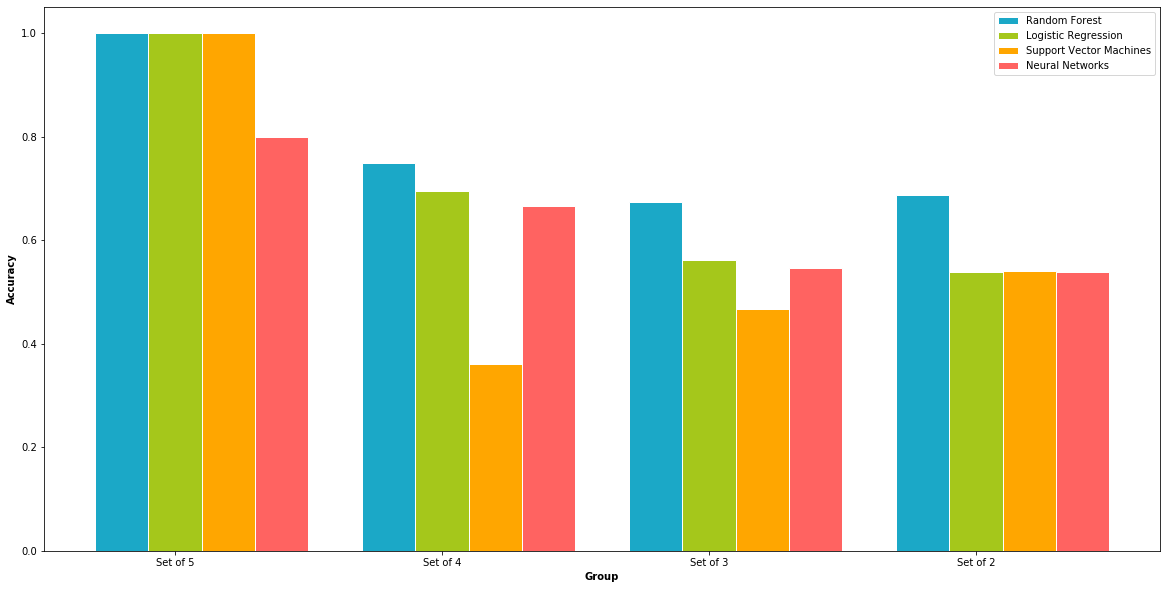

In [23]:
# set width of bar
barWidth = 0.20

# set height of bar
bars1 = [r5[0], r4[0], r3[0], r2[0]]
bars2 = [r5[1], r4[1], r3[1], r2[1]]
bars3 = [r5[2], r4[2], r3[2], r2[2]]
bars4 = [r5[3], r4[3], r3[3], r2[3]]

# Set position of bar on X axis
r_1 = np.arange(len(bars1))
r_2 = [x + barWidth for x in r_1]
r_3 = [x + barWidth for x in r_2]
r_4 = [x + barWidth for x in r_3]

# figuresize
plt.figure(figsize=(20, 10))

# Make the plot
plt.bar(r_1, bars1, color='#1BA8C7', width=barWidth, edgecolor='white', label='Random Forest')
plt.bar(r_2, bars2, color='#A5C71B', width=barWidth, edgecolor='white', label='Logistic Regression')
plt.bar(r_3, bars3, color='#ffa600', width=barWidth, edgecolor='white', label='Support Vector Machines')
plt.bar(r_4, bars4, color='#ff6361', width=barWidth, edgecolor='white', label='Neural Networks')

# Add xticks on the middle of the group bars
plt.xlabel('Group', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(r_1))], ['Set of 5', 'Set of 4', 'Set of 3', 'Set of 2'])

# Create legend & Show graphic
plt.legend()
plt.show()


---
#### Summary
* First I took three dataset of different type of games of DOTA-2 i.e. International, Premier and Professional mathces.
* The whole dataset is too large so I took only the particular columns from the dataset that I have used for my analysis i.e Match ID, Player1-Heroid, Player2-Heroid, Player3-Heroid ,Player4-Heroid , Player4-Heroid and match result.
* Then I've merged all different datas together.
* Taking a json file containing name, id's and localized_name of the DOTA-2 Heroes, I've written a function which returned Name of the hero by parsing through the Hero ID.
* After this I've found out which hero has been banned the most, from the data collected from different type of games.
* Then I've found which hero has been picked the most by the winning teams.
* Then, I've found out which set/combination of 5, 4, 3 and 2 heroes were picked the most by the teams.
* Then, I've found out which teams,Dire or Radi, won most of the games.
* Then for the classifcation model I took only the neccessary data from the games and applied on different dataset(set of 5, 4, 3, and 2) which I got from different sets of heroes.
* I've tried to apply different Classifcation model on the datasets and found out which model is better for our dataet.
* Finally, I've found that the Random Forest classifier gives the most accurate results for our dataset.
